# Manipulate Images of PPDisk Model - Dust Continuum

## 00 - About *HD163296*

### Information:
* RA DEC (FK5): 17h53m20.6063742757s -21d56m57.379723676s
* Star Class: Herbig Ae/Be star
* Spectral Type: A1Vep C
* Star Mass: 2.3 $M_{\odot}$
* Star Radius: 1.66 $R_{\odot}$
* Star Temperature: 9330 K
* Distance to us: 140. pc
* Inclination Angle: $42^{\circ}$
* Position Angle: $132^{\circ}$
* Disk Radius: 250. unit:AU
* Gap Position: 60., 100., 160. unit:AU

### Reference:
* *Rosenfeld et al.(2013)*
* *Isella et al. (2016)*
* *Gregorio-Monsalvo et al. (2013)*
* http://simbad.u-strasbg.fr/simbad/sim-id?Ident=HD+163296
* http://www.exoplanetkyoto.org/exohtml/HD_163296.html
* https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html

### Observation Data:
* <a href="https://jvo.nao.ac.jp/portal/alma/archive.do?action=target.info&target=HD_163296&orderBy=&order=&showAll=false&limit=500&offset=0&freqType=X&freq=&freqAndOr=and&freqLow=&freqUpp=&fbclid=IwAR1eZRK1ERP1FuIdsGMyY4XEotGVWUjyU1P3Hh1yquWG90CzCnESUYvPCuk"> ALMA Fits Archive - ALMA01117198 (calibrated_final_cont.image.fits)</a>
* This image hasn't done pbcor. (Primary Beam Correction)

## 01 - Setup

In [1]:
import os
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from matplotlib import cm
from radmc3dPy import *
from astropy.io import fits

## 02 - Model Parameter

* ALMA BAND 6 Parameter

In [2]:
Bmaj = 0.27366140484810003      # arcsec (diameter)
Bmin = 0.18321035802364802      # arcsec (diameter)
PA   = -87.8557434082           # deg
Dpc  = 122.                     # Parsec
arcs_pixel   = 0.03             # Arcsec / Pixel
pixel_number = 960              # Pixel Number
Freq = 2.260538233010E+11       # width: 1.306843347216E+10 
B_Pixel = Bmaj/2 * Bmin/2 * np.pi / (arcs_pixel*arcs_pixel)   # Beam / Pixel

## 03 - Basic Manipulation

### (1) Convolution
*  ALMA Resolution FWHM(") = 76 / max_baseline(km) / frequency(GHz) 

#### Shortest Baseline (0.16 km)

Reading image.out
FWHM = 2.101269


<Figure size 432x288 with 0 Axes>

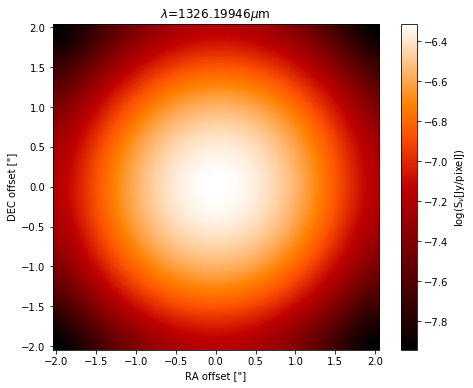

In [3]:
fig = plt.figure()
image.makeImage(npix=683,incl=42.,posang=-132.,wav=natconst.cc/Freq*1e4,sizeau=500)   # This calls radmc3d
im = image.readImage()

plt.figure(figsize=(8,6))
res_fwhm = 76/0.16/(Freq/1e9)
print('FWHM = %.6f' % res_fwhm)
cim = im.imConv(fwhm=[res_fwhm, res_fwhm], pa=PA , dpc=122.)   # fwhm unit: arcsec
image.plotImage(cim, arcsec=True, dpc=122., log=True, maxlog=5, bunit='snu', cmap=plt.cm.gist_heat)
plt.show()

#### Longest Baseline (16 km)

Reading image.out
FWHM = 0.021013


<Figure size 432x288 with 0 Axes>

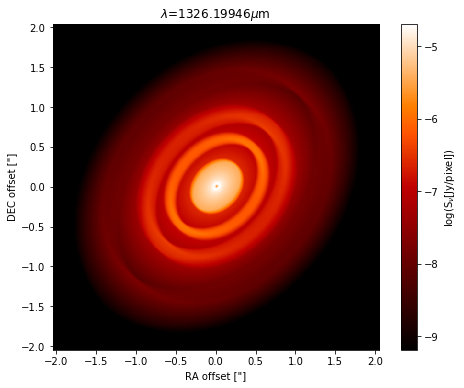

In [4]:
fig = plt.figure()
image.makeImage(npix=683,incl=42.,posang=-132.,wav=natconst.cc/Freq*1e4,sizeau=500)
im = image.readImage()

plt.figure(figsize=(8,6))
res_fwhm = 76/16/(Freq/1e9)
print('FWHM = %.6f' % res_fwhm)
cim = im.imConv(psfType='gauss', fwhm=[res_fwhm, res_fwhm], pa=PA, dpc=122.)   # fwhm unit: arcsec
image.plotImage(cim, arcsec=True, dpc=122., log=True, maxlog=4.5, bunit='snu', cmap=plt.cm.gist_heat)
#cim.writeFits('Best_Res.fits', dpc=122., coord='17h53m20.6063742757s -21d56m57.379723676s')
plt.show()

## 04 - Convolution and Transform from **Jy/Pixel** to **Jy/Beam**

Reading image.out


<Figure size 432x288 with 0 Axes>

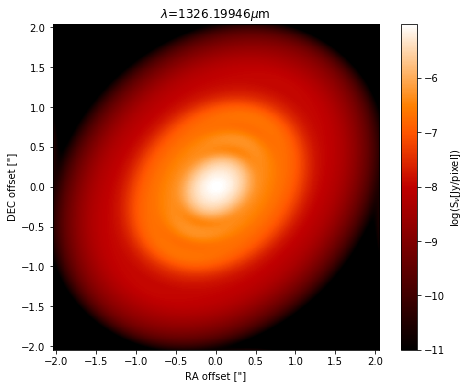

In [5]:
fig = plt.figure()
image.makeImage(npix=683,incl=42.,posang=-132.,wav=natconst.cc/Freq*1e4,sizeau=500)   # This calls radmc3d
im = image.readImage()
plt.figure(figsize=(8,6))
cim = im.imConv(psfType='gauss', fwhm=[Bmaj, Bmin], pa=PA, dpc=122.)   # fwhm unit: arcsec
image.plotImage(cim, arcsec=True, dpc=122., log=True, maxlog=6, bunit='snu', cmap=plt.cm.gist_heat)
plt.show()

### (1) Use Radmc3D **ImConv**
* This Method is included in Radmc3D package
* But it seems not working well for now

Reading image.out
Before_imConv.fits already exists


Do you want to overwrite it (yes/no)? yes


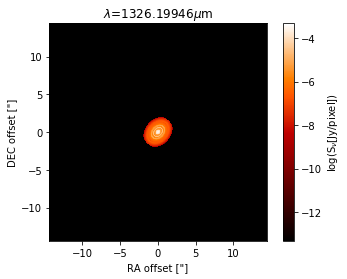

{'implot': <matplotlib.image.AxesImage at 0x7fefafd336d8>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7fefafcf0128>}

In [6]:
image.makeImage(npix=pixel_number, incl=42., posang=-132., wav=natconst.cc/Freq*1e4, sizeau=pixel_number*Dpc*arcs_pixel)
im = image.readImage()
im.writeFits('Before_imConv.fits', dpc=Dpc, coord='17h56m21.2814s -21d57m22.358s')
image.plotImage(im, arcsec=True, dpc=122., log=True, maxlog=10, bunit='snu', cmap=plt.cm.gist_heat)

Reading image.out


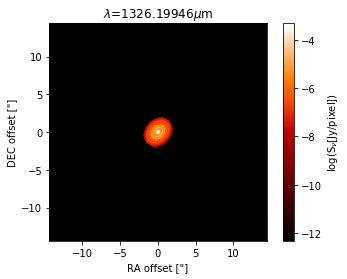

After_imConv_Circ.fits already exists


Do you want to overwrite it (yes/no)? yes


In [7]:
image.makeImage(npix=pixel_number, incl=42., posang=-132., wav=natconst.cc/Freq*1e4, sizeau=pixel_number*Dpc*arcs_pixel)
cim1 = image.readImage()
cim1.imConv(psfType='gauss', fwhm=[((Bmaj/2 + Bmin/2)), ((Bmaj/2 + Bmin/2))], pa=PA, dpc=Dpc)
image.plotImage(cim1, arcsec=True, dpc=122., log=True, maxlog=9, bunit='snu', cmap=plt.cm.gist_heat)
cim1.writeFits('After_imConv_Circ.fits', dpc=Dpc, coord='17h56m21.2814s -21d57m22.358s')

Reading image.out


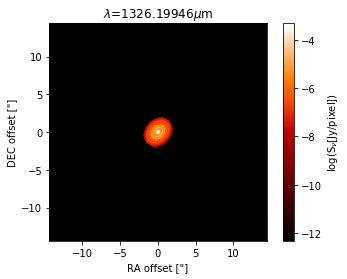

After_imConv_Ellip.fits already exists


Do you want to overwrite it (yes/no)? yes


In [8]:
image.makeImage(npix=pixel_number, incl=42., posang=-132., wav=natconst.cc/Freq*1e4, sizeau=pixel_number*Dpc*arcs_pixel)
cim2 = image.readImage()
cim2.imConv(psfType='gauss', fwhm=[Bmaj, Bmin], pa=PA, dpc=Dpc)
image.plotImage(cim2, arcsec=True, dpc=122., log=True, maxlog=9, bunit='snu', cmap=plt.cm.gist_heat)
cim2.writeFits('After_imConv_Ellip.fits', dpc=Dpc, coord='17h56m21.2814s -21d57m22.358s')

In [9]:
# Data_P = fits.getdata(output)
# Data_B = Data_P * B_Pixel
# Head_B = fits.getheader(output)
# fits.writeto(output, Data_B, Head_B, overwrite=True)

### (2) Use Astropy Convolution

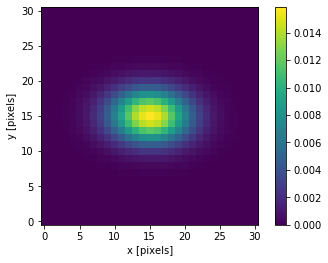

In [10]:
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
import matplotlib.pyplot as plt

xfwhm = Bmaj
yfwhm = Bmin
xstddev = (xfwhm/arcs_pixel) / 2.355
ystddev = (yfwhm/arcs_pixel) / 2.355
rotation = np.pi/2 - PA / 180 * np.pi # Different Def. of position angle and rotation angle (astropy)

gaussian_2D_kernel = Gaussian2DKernel(xstddev, ystddev, rotation)
plt.imshow(gaussian_2D_kernel, interpolation='none', origin='lower')
plt.xlabel('x [pixels]')
plt.ylabel('y [pixels]')
plt.colorbar()
plt.show()

In [11]:
image.makeImage(npix=pixel_number, incl=42., posang=-132., wav=natconst.cc/Freq*1e4, sizeau=pixel_number*Dpc*arcs_pixel)
cim = image.readImage()
cim.writeFits('Before_Conv.fits', dpc=Dpc, coord='17h56m21.2814s -21d57m22.358s')
Data_P = fits.getdata('Before_Conv.fits')[0]
Data_B = B_Pixel * Data_P
Head_B = fits.getheader('Before_Conv.fits')
fits.writeto('Before_Conv.fits', Data_B, Head_B, overwrite=True)

kernel = Gaussian2DKernel(x_stddev=xstddev, y_stddev=ystddev, theta=-rotation)
astropy_conv = convolve(Data_B, kernel)
Head_B = fits.getheader('Before_Conv.fits')
fits.writeto('After_Conv.fits', astropy_conv, Head_B, overwrite=True)

Reading image.out
Before_Conv.fits already exists


Do you want to overwrite it (yes/no)? yes


## 05 - Data Analysis

### (1) Load Simulation Data And Observation Data

In [12]:
data_obs = fits.getdata('fits/ALMA01117198.fits')[0,0]
head_obs = fits.getheader('fits/ALMA01117198.fits')
data_sim = fits.getdata('After_Conv.fits')
head_sim = fits.getheader('After_Conv.fits')

### (2) Accumulate Intensity Ring by Ring

In [13]:
def accum_test(data, pa, inc):
    data[data < 0.] = 0
    th = pa/180*np.pi
    phi = inc/180*np.pi
    cent_x, cent_y = len(data)/2, len(data)/2
    
    xs = np.array([[i-cent_x for i in range(len(data))] for i in range(len(data))])
    ys = np.array([[i-cent_y for i in range(len(data))]for j in range(len(data))]).T
    xxs = xs*np.cos(th) + ys*np.sin(th)
    yys = xs*np.cos(phi)*np.sin(th) - ys*np.cos(phi)*np.cos(th)
    rrs = (xxs**2 + yys**2)**0.5
    return rrs

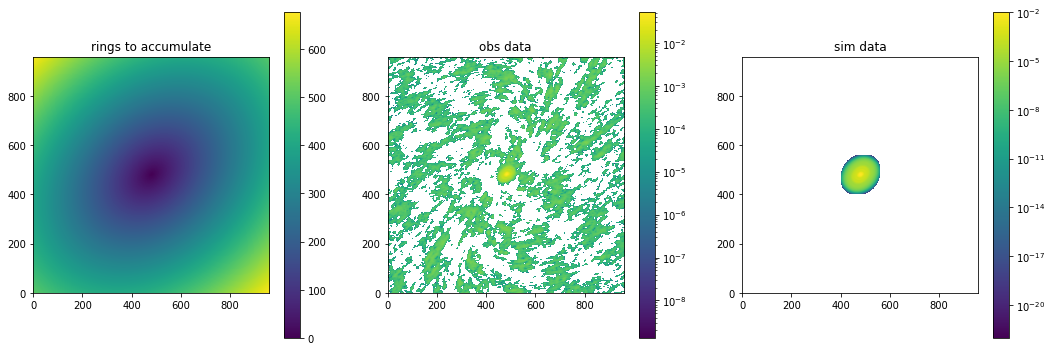

In [14]:
rings = accum_test(data_obs, 132, 42)
# from copy import deepcopy as dcp
# ring1 = dcp(rings)
# ring1[abs(ring1-100)>10.] = 0
# ring1[abs(ring1-100)<=10.] = 1
# ring1[abs(ring1-100)<=9.] = 0

from matplotlib.colors import LogNorm
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(rings, origin='lower')
plt.title('rings to accumulate')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(data_obs, norm=LogNorm(), origin='lower')
plt.title('obs data')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(data_sim, norm=LogNorm(), origin='lower')
plt.title('sim data')
plt.colorbar()
plt.show()

In [17]:
def elliptical_accum(data, dr=10, pa=132, inc=42, arcs_pixel=0.03, dpc=122.):
    '''
    Accumulate Elliptical Ring on 2D Image
    
    data: 2D array
    dr: width to accumulate (unit: au)
    pa: position angle      (unit: deg)
    inc: inclination angle  (unit: deg)
    '''
    
    # Data Preset
    data[data < 0.] = 0
    th = pa/180*np.pi
    phi = inc/180*np.pi
    cent_x, cent_y = len(data)/2, len(data)/2
    
    xs = np.array([[i-cent_x for i in range(len(data))] for i in range(len(data))])
    ys = np.array([[i-cent_y for i in range(len(data))]for j in range(len(data))]).T
    xxs = xs*np.cos(th) + ys*np.sin(th)
    yys = xs*np.cos(phi)*np.sin(th) - ys*np.cos(phi)*np.cos(th)
    rrs = (xxs**2 + yys**2)**0.5
    
    dr  = dr/dpc/arcs_pixel # pixel
    drrs = np.arange(dr, len(data)/2, dr)
    accum_ints = np.zeros(len(drrs))
    accum_stds = np.zeros(len(drrs))
    for i in range(len(drrs)):
        ring = np.where(abs(rrs-drrs[i]) <= dr)
        accum_ints[i] = np.sum(data[ring])
        accum_stds[i] = np.std(data[ring])
    
    au_pixel = arcs_pixel * dpc
    drrs *= au_pixel
    return drrs, accum_ints, accum_stds

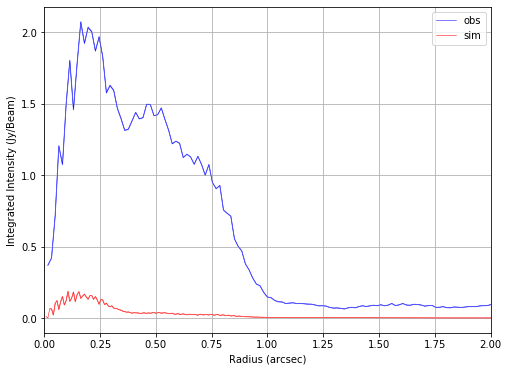

In [19]:
rr, accum, std = elliptical_accum(data_obs, 2, 132, 42)
plt.figure(figsize=(8,6))
plt.plot(rr/Dpc, accum, 'b-', label='obs', linewidth=0.5)
plt.fill_between(rr/Dpc, accum-1*std, accum+1*std, color='blue', alpha=0.3)

rr, accum, std = elliptical_accum(data_sim, 1, 132, 42)
plt.plot(rr/Dpc, accum, 'r-', label='sim', linewidth=0.5)
plt.fill_between(rr/Dpc, accum-1*std, accum+1*std, color='red', alpha=0.3)

plt.xlabel('Radius (arcsec)')
plt.ylabel('Integrated Intensity (Jy/Beam)')
plt.xlim(0.0, 2.0)
plt.legend()
plt.grid()
plt.show()